# $\sin^{2}(\theta_{W})$ Running Plot

Kurtis Bartlett

2017/3/15

Ipython notebook for generating the Marciano $\sin^{2}(\theta_{W})$ running with $Q^{2}$ plot.

Ref: A. Czarnecki and W. J. Marciano, Polarized Moller Scattering Asymmetries, Int. J. Modern Phys. A15, 2365 (2000)

In [1]:
# Import necessary packages and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Use text and computer modern for text formating
pp.rcParams["text.usetex"] = "True"
pp.rcParams["font.family"] = "serif"
pp.rcParams["font.serif"] = "Computer Modern Roman"
pp.rcParams["font.sans-serif"] = "Computer Modern Sans serif"

In [3]:
# Keep matplotlib plots inline
%matplotlib inline

In [4]:
pp.style.use('seaborn-ticks')
sns.set_palette("muted")
plot_size = 12*np.array([1.0,(2.0/(1.0+np.sqrt(5.0)))]) #Use Golden ratio as aspect ratio for plots

In [5]:
# Constants
pi = np.pi
alpha = (1.0/137.035999139) # Fine structure constant Ref: PDG 2016

mw = 80.385 # Mass of W^{+-} boson [GeV/c^2] Ref: PDG 2016
mz = 91.1876 # Mass of Z boson [GeV/c^2] Ref: PDG 2016

sin2thetaw = 1-((mw*mw)/(mz*mz))
cos2thetaw = 1-sin2thetaw
#sin2thetaw = 0.22336 # On-shell (tree level) SM value of sin^2(theta_w) Ref: PDG 2016
#cos2thetaw = 0.77664 # On-shell (tree level) SM value of cos^2(theta_w) calculated from sin2theta_w
sin2thetawmzmsb = 0.23129 # Value of sin^2(theta_w) evaluated at the Z-pole. Ref: PDG 2016


# Fermion mass and charge
#m_f = np.array([0.5109989461, # Electron
#                2.2, # Up
#                4.7, # Down
#                96.0, # Strange
#                105.6583745, # Muon
#                1270.0, # Charm
#                1776.86, # Tau
#                4180.0, # Bottom
#               ])/1000.0 # [MeV/c^2]->[GeV/c^2]

m_f = np.array([0.5109989461, # Electron
                100.0, # Up
                100.0, # Down
                700.0, # Strange
                105.6583745, # Muon
                1275.0, # Charm
                1776.86, # Tau
                4180.0, # Bottom
               ])/1000.0 # [MeV/c^2]->[GeV/c^2]

Q_f = np.array([-1.0, # Electron
              (2.0/3.0), # Up
              (-1.0/3.0), # Down
              (-1.0/3.0), # Strange
              -1.0, # Muon
              (2.0/3.0), # Charm
              -1.0, #Tau
              (-1.0/3.0)]) # Bottom

T_f = np.array([-0.5, # Electron
                0.5, # Up
                -0.5, # Down
                -0.5, # Strange
                -0.5, # Muon
                0.5, # Charm
                -0.5, # Tau
                -0.5]) # Bottom

N_f = np.array([1, # Electron
                3, # Up
                3, # Down
                3, # Strange
                1, # Muon
                3, # Charm
                1, # Tau
                3]) # Bottom

In [6]:
# Define functions
def kappa_f(qq, m_f, T_f, Q_f, N_f):
    'Fermion Loop Function'
    
    sum_f = 0.0
    fterm_one = 0.0
    fterm_two = 0.0
    for i in range(len(m_f)):
        'Loop over fermion masses'
        z_f = (m_f[i]*m_f[i])/qq
        
        p_f = np.sqrt(1.0 + 4.0*z_f)
        
        fterm_one = N_f[i]*(T_f[i]*Q_f[i] - 2.0*sin2thetaw*Q_f[i]*Q_f[i])
        
        fterm_two = np.log((m_f[i]*m_f[i])/(mz*mz)) - (5.0/3.0) + 4.0*z_f + (1.0 - 2.0*z_f)*p_f*np.log((p_f + 1.0)/(p_f - 1.0))
        
        sum_f = sum_f + fterm_one*fterm_two
        
    kappa = 1.0 - ((alpha)/(2.0*pi*sin2thetaw))*(1.0/3.0)*sum_f
    return kappa

def kappa_b(qq):
    'Boson Loop Function'

    z = (mw*mw)/qq
    p = np.sqrt(1.0 + 4.0*z)
    r = np.log((p + 1.0)/(p - 1.0))
    
    term_one = ((-42.0*cos2thetaw + 1.0)/12.0)*np.log(cos2thetaw)
    
    term_two = (1.0/18.0)
    
    term_three = -((p/2.0)*r - 1.0) * ((7.0 - 4.0*z)*cos2thetaw + (1.0/6.0)*(1.0 + 4.0*z))
    
    term_four = -z*((3.0/4.0) - z + (z - (3.0/2.0))*p*r + z*(2.0 - z)*r*r)
    
    kappa = 1.0 - (alpha/(2.0*pi*sin2thetaw))*(term_one + term_two + term_three + term_four)
    return kappa

In [7]:
#q = np.array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009,   
#              0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,  
#              0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 
#              0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
#              1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
#              10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 
#              100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 
#              1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 10000.0])
q = np.concatenate((np.arange(1e-4,1e-3,1e-5),
                    np.arange(1e-3,1e-2,1e-4), 
                    np.arange(1e-2,1e-1,1e-3), 
                    np.arange(1e-1,1e0,1e-2), 
                    np.arange(1e0,1e1,1e-1), 
                    np.arange(1e1,1e2,1e0), 
                    np.arange(1e2,1e3,1e1), 
                    np.arange(1e3,1e4,1e2)))

qq = np.square(q)

In [8]:
fermion = np.zeros(len(q))
boson = np.zeros(len(q))
total = np.zeros(len(q))
for i in range(len(q)):
    fermion[i] = kappa_f(qq[i], m_f, T_f, Q_f, N_f)*sin2thetawmzmsb
    if(qq[i] > 0.001):
        boson[i] = kappa_b(qq[i])*sin2thetawmzmsb
    else:
        boson[i] = kappa_b(0.001)*sin2thetawmzmsb
    total[i] = fermion[i]+boson[i]-sin2thetawmzmsb #Subtract factor of one to avoid double counting boson tree level diagrams.

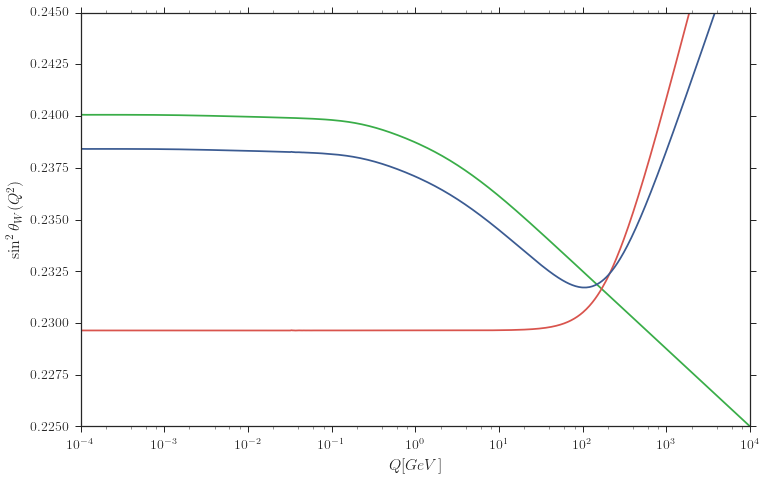

In [19]:
pp.figure(figsize=plot_size)
pp.plot(q,fermion, color=sns.xkcd_rgb['medium green'])
pp.plot(q,boson, color=sns.xkcd_rgb['pale red'])
pp.plot(q,total, color=sns.xkcd_rgb['denim blue'])
#pp.legend(loc='lower left', fontsize=11)
pp.xscale('log')
pp.xlim(1e-4,1e4)
pp.ylim(0.225,0.245)
pp.xlabel('$Q [GeV]$', fontsize=16)
pp.ylabel('$\\sin^{2}\\theta_{W}(Q^{2})$', fontsize=16)
pp.xticks(fontsize=14)
pp.yticks(np.linspace(0.225,0.245,9),fontsize=14)
pp.savefig('plots/sin2tw_running_plot.pdf', bbox_inches='tight')
pp.show()